# Generate the number of single threshold

In [1]:
from total2partial import *
import time 
import re

In [2]:
#(x+y)z
start =time.time()
file = '4_2_final.dat'
print(file)
for i in range(1,4):
    r = getPartialOrderByThreshold(i,file)
    print('Threshold: {} --> PG: {}'.format(i, len(r)))
time.time() -start

4_2_final.dat
Threshold: 1 --> PG: 20
Threshold: 2 --> PG: 155
Threshold: 3 --> PG: 756


0.03368496894836426

In [5]:
# xyz
start =time.time()
file = '2_2_2_final.dat'
print(file)
for i in range(1,4):
    r = getPartialOrderByThreshold(i,file)
    print('Threshold: {} --> PG: {}'.format(i, len(r)))
time.time() -start

2_2_2_final.dat
Threshold: 1 --> PG: 20
Threshold: 2 --> PG: 150
Threshold: 3 --> PG: 707


0.019524097442626953

In [6]:
# x+y+z
start = time.time()
file = '8_final.dat'
print(file)
for i in range(1,4):
    r = getPartialOrderByThreshold(i,file)
    print('Threshold: {} --> PG: {}'.format(i, len(r)))
time.time() -start

8_final.dat
Threshold: 1 --> PG: 20
Threshold: 2 --> PG: 150
Threshold: 3 --> PG: 707


0.019148826599121094

In [7]:
# (x+y)zw
# computation time for 4 inputs is 100-1000 times than that of 3 inputs
# getPartialOrderByThreshold can be optimized in the future like by using distributed computation
start = time.time()
file = '4_2_2_final.dat'
print(file)
for i in range(1,4):
    r = getPartialOrderByThreshold(i,file)
    print('Threshold: {} --> PG: {}'.format(i, len(r)))
time.time()-start

4_2_2_final.dat
Threshold: 1 --> PG: 155
Threshold: 2 --> PG: 3808
Threshold: 3 --> PG: 45404


10.251657009124756

In [5]:
# check the realizability of total ordering induce the realizability of  partial  ordering
print(totalInducePartial(total = [0,1,2,3,4,5,6,7],partial =[0,1,-2,2,3,4,-1,6,7]))
print(totalInducePartial(total = [0,1,2,3,4,5,6,7],partial =[0,2,-2,1,3,4,-1,6,7]))

True
False


In [13]:
# x+y+z+w
start = time.time()
file = '16_final.dat'
print(file)
for i in range(1,2):
    r = getPartialOrderByThreshold(i,file)
    print('Threshold: {} --> PG: {}'.format(i, len(r)))
time.time() -start

16_final.dat
Threshold: 1 --> PG: 150


0.04355216026306152

In [3]:
# xyzw
# computation time for 4 inputs is 100-1000 times than that of 3 inputs
# getPartialOrderByThreshold can be optimized in the future like by using distributed computation
start = time.time()
file = '2_2_2_2_final.dat'
print(file)
for i in range(1,4):
    r = getPartialOrderByThreshold(i,file)
    print('Threshold: {} --> PG: {}'.format(i, len(r)))
time.time()-start

2_2_2_2_final.dat
Threshold: 1 --> PG: 150
Threshold: 2 --> PG: 3287
Threshold: 3 --> PG: 35368


2.673882007598877

In [5]:
# (x+y+z)w
# computation time for 4 inputs is 100-1000 times than that of 3 inputs
# getPartialOrderByThreshold can be optimized in the future like by using distributed computation
start = time.time()
file = '8_2_final.dat'
print(file)
for i in range(1,4):
    r = getPartialOrderByThreshold(i,file)
    print('Threshold: {} --> PG: {}'.format(i, len(r)))
time.time()-start

8_2_final.dat
Threshold: 1 --> PG: 150
Threshold: 2 --> PG: 3799
Threshold: 3 --> PG: 46809


23.71649694442749

# Generate the number of pair of threshold

The nth pair of threshold will be '-n' '+n', which means the partial order list is a mixture of integers and strings

In [ ]:
#(x+y)z
start =time.time()
file = '4_2_final.dat'
print(file)
for i in range(1,4):
    r = getPartialOrderByThreshold(i,file)
    print('Threshold: {} --> PG: {}'.format(i, len(r)))
time.time() -start

# stability statistics for single region

## Counting method

In [17]:
# first use the standard method to compute the statistics
# by using the data already computed in KUIAS for two hours

import sys
sys.path+=['/Users/lunzhang/anaconda3/lib/python3.6/site-packages']
import DSGRN
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def NetworkSpecStr(net_spec):
    net_spec_str = ""

    spec = "SOX17 : "
    activators = ' + '.join([ 'Y' + str(j) for j in range(0,2) if net_spec[j] == 1])
    repressors = ')('.join([ '~Y' + str(j) for j in range(0,2) if net_spec[j] == -1])
    if activators:
        activators = '(' + activators + ')'
    if repressors:
        repressors = '(' + repressors + ')'
    spec += activators + repressors + "\n "
    spec = spec.replace("Y0", "TAFP2C")
    spec = spec.replace("Y1", "ID1")
    net_spec_str += spec

    spec = "TAFP2C : "
    activators = ' + '.join([ 'Y' + str(j) for j in range(2,5) if net_spec[j] == 1])
    repressors = ')('.join([ '~Y' + str(j) for j in range(2,5) if net_spec[j] == -1])
    if activators:
        activators = '(' + activators + ')'
    if repressors:
        repressors = '(' + repressors + ')'
    spec += activators + repressors + "\n "
    spec = spec.replace("Y2", "HAND1")
    spec = spec.replace("Y3", "ID1")
    spec = spec.replace("Y4", "SOX17")
    net_spec_str += spec

    spec = "PRDMI : " + ("~SOX17" if net_spec[5] == -1 else "SOX17") + "\n "
    net_spec_str += spec

    spec = "HAND1 : " + ("~PRDMI" if net_spec[6] == -1 else "PRDMI") + "\n "
    net_spec_str += spec

    spec = "ID1 : " + ("~PRDMI" if net_spec[7] == -1 else "PRDMI")
    net_spec_str += spec

    return net_spec_str

In [19]:
pwd

'/Users/lunzhang/Desktop/datapool/KUIAS'

In [20]:
results = []
for k in range(256):
    results_fname = './DSGRNtest/results/results_' + str(k) + '.txt'
    with open(results_fname, 'r') as f:
        results.append([k] + [int(float(x)) for line in f for x in line.split()])

In [53]:
innw = {'SOX17':['ID1','TAFP2C'], 
        'TFAP2C':['ID1','SOX17','HAND1'],'PRDMI':['SOX17'],'HAND1':['PRDMI'],'ID1':['PRDMI']}
setnodes = ['SOX17','TFAP2C','PRDMI','HAND1','ID1']
regions = [[0,0,0,0,0],[2,1,2,0,2]]

In [22]:
network_specs = []
for k in range(256):
    net_spec_fname = './DSGRNtest/results/net_spec_' + str(k) + '.txt'
    with open(net_spec_fname, 'r') as f:
        network_specs.append([int(k) for line in f for k in line.split()])

In [23]:
# results.sort(key=lambda x: x[2]+x[3]-x[4], reverse=True)
results.sort(key=lambda x: x[4], reverse=True)

In [24]:
results[:5]

[[221, 345600, 14112, 38304, 936, 41],
 [223, 345600, 28224, 19152, 936, 47],
 [253, 345600, 19152, 28224, 936, 35],
 [255, 345600, 38304, 14112, 936, 44],
 [205, 345600, 6048, 28224, 216, 36]]

In [27]:
k=0
(results[k][3] / results[k][1]) * 100

11.083333333333334

In [31]:
spec_index = 221
net_spec = network_specs[spec_index]
net_spec_str = NetworkSpecStr(net_spec)
net_spec_str

'SOX17 : (TAFP2C + ID1)\n TAFP2C : (ID1 + SOX17)(~HAND1)\n PRDMI : SOX17\n HAND1 : ~PRDMI\n ID1 : PRDMI'

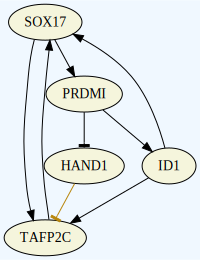

In [32]:
k = 0
spec_index = results[k][0]
net_spec = network_specs[spec_index]
net_spec_str = NetworkSpecStr(net_spec)
network = DSGRN.Network(net_spec_str)

DSGRN.DrawGraph(network)

# Conjugate method

In [34]:
from total2partial import getPartialOrderByThreshold

def parser(nw):
    odegree = {}
    inodes ={}
    ilogic = {}
    inedges = {}
    with open(nw,'r') as file:
        line= file.readline()
        while line:
            line, logic = line.split('-')
            
            node, predecessors = line.split(':')
            
            ilogic[node] = logic.strip()
            
            tempinodes = predecessors.replace('(','+').replace(')','+').split('+')
            tempinodes = [rr for rr in tempinodes if rr ]
            inodes[node] = [r  if r[0]!='~' else r[1:] for r in tempinodes]
            
            tempinedges = ['A'  if r[0]!='~' else 'R' for r in tempinodes]
            inedges[node] = tempinedges
            
            line = file.readline()
    
    for node in inodes:
        outdegree = 0
        for currentnode in inodes:
            if node in inodes[currentnode]:
                outdegree+=1
        odegree[node] = outdegree
    return [odegree,inodes,ilogic,inedges]


# the order of node should be in the order of (x+y)z...
# inodes: in nodes, ilogic: in logic
# to get the polynomial index under current state
def getpindex(inodes,inedges,istates):
    s = ''
    activation = {('R','L'),('A','H')}
    repression = {('R','H'),('A','L')}
    for i in range(len(inodes)):
        node = inodes[i]
        coordstate = (inedges[i],istates[node])
        if coordstate in activation:
            s = s+'1'
        else:
            s = s+'0'
    return int(s,2)

# generate coordinate parameter nodes
# the inlogic should be in form 4_2_...
def gencoordpn(logic,odegree):
    file = logic+'_final.dat'
    coordpn = getPartialOrderByThreshold(odegree,file)
    return coordpn

# odegree: out degree
# r is the 
# coordpn: coordinates parameter node
def getcoordprop(coordpn, state, odegree,inodes,ilogic,inedges, istates):
    pindex = getpindex(inodes,inedges,istates)
    idegree = len(inedges)
    prop = 0
    if state == 'H':
        num = [r for r in coordpn if r.index(-1) < r.index(pindex)]
        prop = len(num)/len(coordpn)
    if state == 'L':
        num = [r for r in coordpn if r.index(-odegree) > r.index(pindex)]
        prop = len(num)/len(coordpn)
    return prop

# it seems for each node we need: the current state, the logic of in, the outdegree, the states of all innode
# we need to create 3 dictionary for nodes
# states of each node,  in logic of each node, out degree of each node

def computetotalprop(nw,istates):
    odegree,inodes,ilogic,inedges = parser(nw)
    prop = 1
    for node in istates:
        coordpn = gencoordpn(ilogic[node], odegree[node]) # the ilogic and odegree of node
        prop*=getcoordprop(coordpn, istates[node], odegree[node], inodes[node], ilogic[node], inedges[node], istates) # all of the node
    return prop

# for each 1-d parameter space
def countregions(r,state,numtheta,nodeindex,regions):
    nodepositions = [r[nodeindex] for r in regions]
    downtheta = [p-numtheta-1 for p in nodepositions]
    uptheta = [p-numtheta for p in nodeposition]
    count = 0
    for instance in r:
        instance = True
        if downtheta >= -numtheta:
            if r.index(state) < r.index(downtheta):
                # instance = False
                continue
        if uptheta < 0:
            if r.index(state) > r.index(uptheta):
                # instance =
                continue
        count+=1
    return count

In [35]:
nw = 'nw.txt'
istates = {'SOX17':'H', 'PRDMI':'H', 'HAND1':'L', 'ID1':'H','TAFP2C':'H'}
computetotalprop(nw,istates)

0.11083333333333331

In [15]:
38304/345600

0.11083333333333334

In [ ]:
istates = {'SOX17':'L', 'PRDMI':'L', 'HAND1':'L', 'ID1':'L','TAFP2C':'L'}
odegree = {'SOX17':2, 'PRDMI':2, 'HAND1':1, 'ID1':2,'TAFP2C':1}
inodes = {'SOX17':['ID1','TAFP2C'], 'PRDMI':['SOX17'], 'HAND1':['PRDMI'], 'ID1':['PRDMI'],
          'TAFP2C':['SOX17','ID1','HAND1']}
ilogic = {'SOX17':'2_2', 'PRDMI':'2', 'HAND1':'2', 'ID1':'2','TAFP2C':'4_2'}
inedges = {'SOX17':['A','A'], 'PRDMI':['A'], 'HAND1':['R'], 'ID1':['A'],'TAFP2C':['A','A','R']}

In [25]:
nw = 'nw.txt'
odegree,inodes,ilogic,inedges = parser(nw)

In [26]:
odegree

{'SOX17': 2, 'TAFP2C': 1, 'PRDMI': 2, 'HAND1': 1, 'ID1': 2}

In [27]:
inodes

{'SOX17': ['TAFP2C', 'ID1'],
 'TAFP2C': ['ID1', 'SOX17', 'HAND1'],
 'PRDMI': ['SOX17'],
 'HAND1': ['PRDMI'],
 'ID1': ['PRDMI']}

In [28]:
ilogic

{'SOX17': '2_2', 'TAFP2C': '4_2', 'PRDMI': '2', 'HAND1': '2', 'ID1': '2'}

In [29]:
inedges

{'SOX17': ['A', 'A'],
 'TAFP2C': ['A', 'A', 'R'],
 'PRDMI': ['A'],
 'HAND1': ['R'],
 'ID1': ['A']}

SOX17:ID1+TAFP2C
PRDMI:SOX17
ID1:PRDMI
TAFP2C:(SOX17+ID1)~HADN1

In [121]:
r = '~HADN1(SOX17+ID1)'.replace('(','+').replace(')','+').split('+')
r = [rr for rr in r if rr ]
r

['~HADN1', 'SOX17', 'ID1']

In [136]:
inodes ={}
inedges = {}
ilogic = {}
line = 'TAFP2C:(SOX17 +ID1)~HADN1-4_2'
line, logic = line.split('-')      
node, predecessors = line.split(':')
ilogic[node] = logic
node, predecessors = line.split(':')
tempinodes = predecessors.replace('(','+').replace(')','+').split('+')
tempinodes = [rr for rr in tempinodes if rr ]
inodes[node] = [r if r[0]!='~' else r[1:] for r in tempinodes]
tempinedges = ['A'  if r[0]!='~' else 'R' for r in tempinodes]
inedges[node] = tempinedges

# Threshold pairs

In [1]:
from thresholdPairs import *

In [81]:
# the funtion that will generate n pairs of threholds
def getPartialOrderByThresholdPair(n,f):
    orders = set()
    with open(f,'r') as file:
        line = file.readline().strip()
        while line:
            line = tuple(map(lambda x: int(x), line.split(' ')))
            orders.add(line)
            line = file.readline().strip()
    print(len(orders))
    for i in range(n,0,-1):
        currorders = set()
        currorders = set([tuple(binsort2(list(order))) for order in pairInsert(i,orders)])
        orders = currorders
        #print(orders)
    return orders
 
# function will insert +n -n into the partial order with (-1,+1,..., -(n-1),+(n-1)) already 
# inserted
def pairInsert(n,preorders):
    ret = set()
    for preorder in preorders:
        l = len(preorder)
        for j in range(l+1):
            for k in range(j+1,l+2):
                currorder = list(preorder).copy()
                currorder[j:j] = ['-{}'.format(n)]
                currorder[k:k] = ['+{}'.format(n)]
                yield tuple(currorder)
    return ret     

# sort the bins separated by  -+k and -+j
def binsort2(l):
    strindex = []
    for i in range(len(l)):
        if isinstance(l[i],str):
            strindex.append(i)
    strindex = [-1] + strindex + [ len(l) ]     
    #print(strindex)
    for i in range(1,len(strindex)):
        prev, curr = strindex[i-1], strindex[i]
        #print(prev, curr)
        #print(l[prev+1:curr])
        l[prev+1:curr] = sorted(l[prev+1:curr])
    return tuple(l)
        

In [7]:
# -1 +1 threshold pair for (x+y)z
file = '4_2_final.dat'
ret = getPartialOrderByThresholdPair(1,file)
print(len(ret))

155


In [6]:
list(ret)[:10]

[(0, '-1', 4, '+1', 1, 2, 3, 5, 6, 7),
 (0, 1, 2, 4, 6, '-1', 3, '+1', 5, 7),
 (0, 1, 2, '-1', 4, 6, '+1', 3, 5, 7),
 (0, '-1', 1, 2, 4, 6, '+1', 3, 5, 7),
 (0, 1, 4, 5, '-1', 2, '+1', 3, 6, 7),
 (0, 1, 2, '-1', 4, '+1', 3, 5, 6, 7),
 (0, 1, 2, 4, 5, '-1', '+1', 3, 6, 7),
 (0, '-1', 1, 2, 3, '+1', 4, 5, 6, 7),
 ('-1', 0, 1, 2, 4, 6, '+1', 3, 5, 7),
 (0, 1, 2, 4, 6, '-1', '+1', 3, 5, 7)]

In [9]:
# -1 +1 -2 +2threshold pair for (x+y)z
# grows very fast
file = '4_2_final.dat'
ret = getPartialOrderByThresholdPair(2,file)
print(len(ret))

10230


In [10]:
list(ret)[:10]

[(0, 1, 2, '-2', '-1', 3, 4, 5, '+1', '+2', 6, 7),
 ('-1', 0, '+1', 4, '-2', 1, 2, 6, '+2', 3, 5, 7),
 ('-1', '-2', 0, '+1', 1, 4, 5, '+2', 2, 3, 6, 7),
 (0, 2, 4, '-2', '+2', 1, '-1', 3, '+1', 5, 6, 7),
 ('-2', 0, 1, '-1', 4, 5, '+2', 2, 3, 6, '+1', 7),
 (0, 4, '-2', 1, 2, '-1', 6, '+2', 3, 5, '+1', 7),
 (0, 2, 4, '-2', 1, '-1', 3, 5, '+1', 6, '+2', 7),
 (0, 1, 2, 3, '-2', 4, '+2', 5, 6, '-1', 7, '+1'),
 (0, '-1', 1, 2, 3, '-2', 4, 5, '+1', '+2', 6, 7),
 (0, '-1', 1, '-2', 2, 4, '+2', '+1', 3, 5, 6, 7)]